In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
# Load datasets (update file paths if needed)
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
# Display first few rows of each dataset
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [6]:
# Summary of each dataset
print("\nCustomers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Nul

In [7]:
# Check for missing values
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
# Check for duplicate entries
print("\nDuplicate Entries in Customers:", customers.duplicated().sum())
print("Duplicate Entries in Products:", products.duplicated().sum())
print("Duplicate Entries in Transactions:", transactions.duplicated().sum())


Duplicate Entries in Customers: 0
Duplicate Entries in Products: 0
Duplicate Entries in Transactions: 0


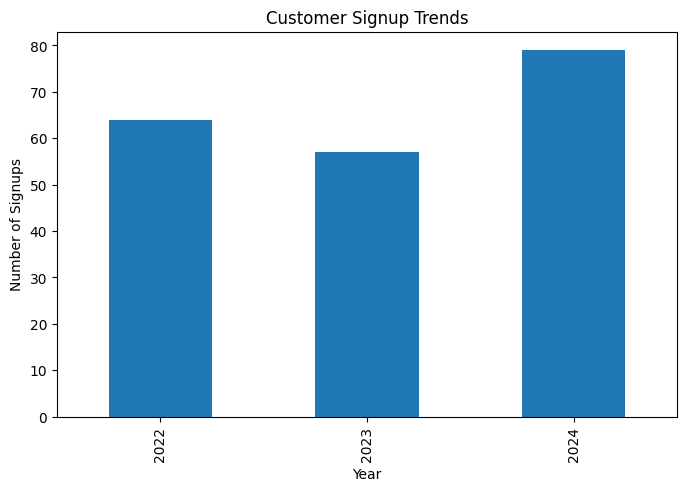

In [9]:
# EDA: Customers
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
signup_trends.plot(kind='bar', title='Customer Signup Trends', figsize=(8, 5))
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

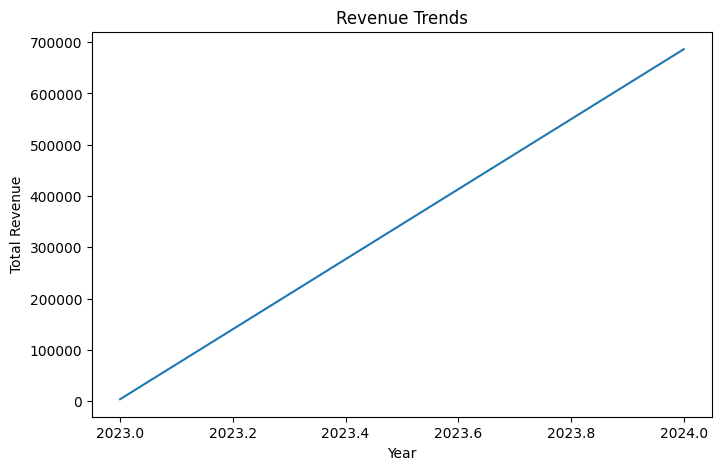

In [10]:
# EDA: Transactions
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionYear'] = transactions['TransactionDate'].dt.year
revenue_per_year = transactions.groupby('TransactionYear')['TotalValue'].sum()
revenue_per_year.plot(kind='line', title='Revenue Trends', figsize=(8, 5))
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

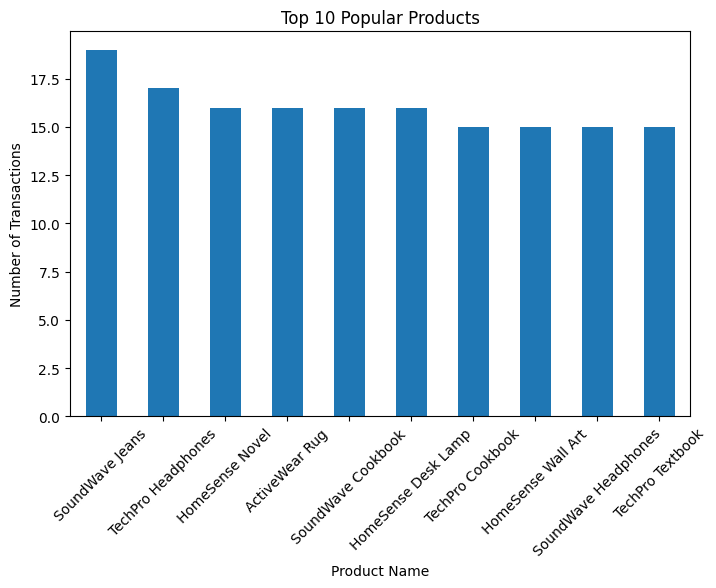

In [11]:
# EDA: Products
popular_products = transactions['ProductID'].value_counts().head(10)
popular_products = popular_products.rename(index=lambda x: products.loc[products['ProductID'] == x, 'ProductName'].values[0])
popular_products.plot(kind='bar', title='Top 10 Popular Products', figsize=(8, 5))
plt.xlabel('Product Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

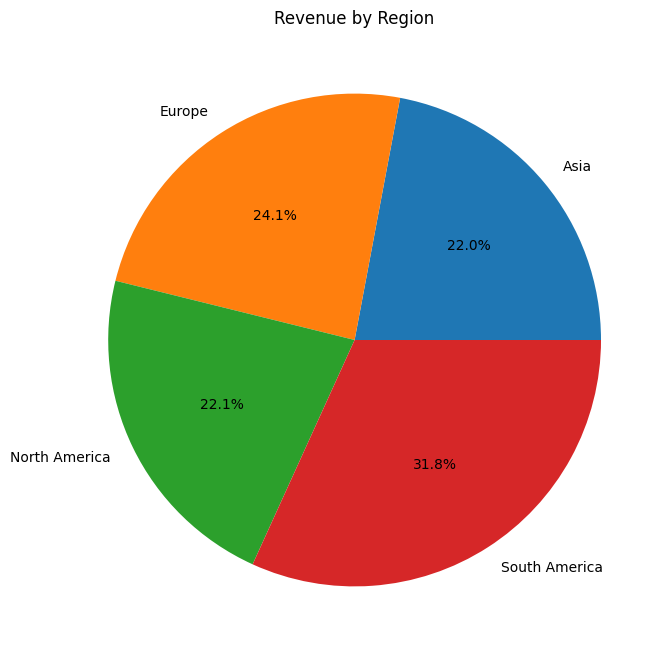

In [12]:
# EDA: Regional Analysis
regional_revenue = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
regional_revenue.plot(kind='pie', title='Revenue by Region', figsize=(8, 8), autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [13]:
# Summary of initial findings
print("\nInitial Findings:")
print("1. Signup trends show customer growth over the years.")
print("2. Yearly revenue trends highlight peak transaction periods.")
print("3. The most popular products generate significant transactions.")
print("4. Regional analysis reveals key revenue-generating areas.")


Initial Findings:
1. Signup trends show customer growth over the years.
2. Yearly revenue trends highlight peak transaction periods.
3. The most popular products generate significant transactions.
4. Regional analysis reveals key revenue-generating areas.
